In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__


'2.3.1+cu118'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [3]:
# Creating data using simple linear regression formula
weight = 0.3
bias = 0.9

start = 0
end = 2
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240],
         [0.9300],
         [0.9360],
         [0.9420],
         [0.9480],
         [0.9540]]))

In [5]:
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [6]:
# Create a train/test split(80:20)
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)


(80, 80, 20, 20)

In [7]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [8]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data,test_label, c="g", s=4, label="Testing data")

    # Plot the predictions if they exist
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})

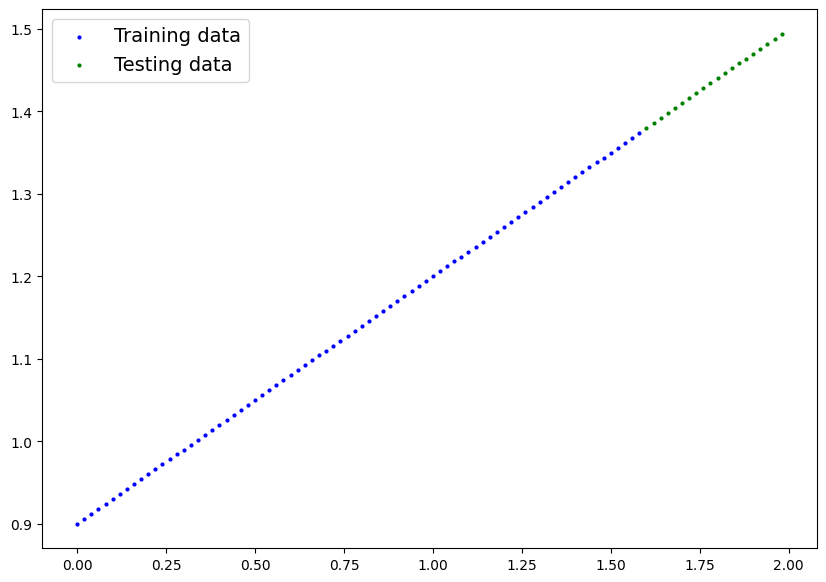

In [9]:
plot_predictions(train_data=X_train.cpu(), train_label=y_train.cpu(), test_data=X_test.cpu(), test_label=y_test.cpu())

In [10]:
class LinearRegressionModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear, applying a linear transformation
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)
LiNet_2 = LinearRegressionModelV3()
LiNet_2, LiNet_2.state_dict()

(LinearRegressionModelV3(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [11]:
next(LiNet_2.parameters()).device

device(type='cpu')

In [12]:
# Set the model to gpu
LiNet_2.to(device)
next(LiNet_2.parameters()).device

device(type='cuda', index=0)

In [13]:
# Set up the loss function and optimizer
loss_fn = nn.L1Loss() # Mean absolute error
optimizer = torch.optim.SGD(params=LiNet_2.parameters(), lr=0.01)

In [14]:
# Training the model
torch.manual_seed(42)
epochs = 300

for epoch in range(epochs):
    LiNet_2.train()

    # Forward propagation
    y_pred = LiNet_2(X_train)

    # Calculating the training loss
    loss = loss_fn(y_pred, y_train)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Perform backpropagation
    loss.backward()

    # Optimizer step
    optimizer.step()

    # Testing 
    LiNet_2.eval()
    with torch.inference_mode():
        test_pred = LiNet_2(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    # Printing the results
    if (epoch + 1) % 20 == 0:
        print(f"Epoch: {epoch + 1} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 20 | Loss: 0.14456188678741455 | Test loss: 0.3978465497493744
Epoch: 40 | Loss: 0.09432105720043182 | Test loss: 0.21485261619091034
Epoch: 60 | Loss: 0.07458628714084625 | Test loss: 0.15007857978343964
Epoch: 80 | Loss: 0.056376248598098755 | Test loss: 0.1105293557047844
Epoch: 100 | Loss: 0.03819151595234871 | Test loss: 0.07437831163406372
Epoch: 120 | Loss: 0.020006773993372917 | Test loss: 0.038227301090955734
Epoch: 140 | Loss: 0.0020497352816164494 | Test loss: 0.004522216506302357
Epoch: 160 | Loss: 0.011595277115702629 | Test loss: 0.004522216506302357
Epoch: 180 | Loss: 0.011595277115702629 | Test loss: 0.004522216506302357
Epoch: 200 | Loss: 0.011595277115702629 | Test loss: 0.004522216506302357
Epoch: 220 | Loss: 0.011595277115702629 | Test loss: 0.004522216506302357
Epoch: 240 | Loss: 0.011595277115702629 | Test loss: 0.004522216506302357
Epoch: 260 | Loss: 0.011595277115702629 | Test loss: 0.004522216506302357
Epoch: 280 | Loss: 0.011595277115702629 | Test loss:

In [15]:
LiNet_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3001]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8953], device='cuda:0'))])

In [16]:
weight, bias

(0.3, 0.9)

In [17]:
# Make predictions on the test data
LiNet_2.eval()
with torch.inference_mode():
    y_preds = LiNet_2(X_test)
y_preds

tensor([[1.3755],
        [1.3815],
        [1.3875],
        [1.3935],
        [1.3995],
        [1.4055],
        [1.4115],
        [1.4175],
        [1.4235],
        [1.4295],
        [1.4355],
        [1.4415],
        [1.4475],
        [1.4535],
        [1.4595],
        [1.4655],
        [1.4715],
        [1.4775],
        [1.4835],
        [1.4895]], device='cuda:0')

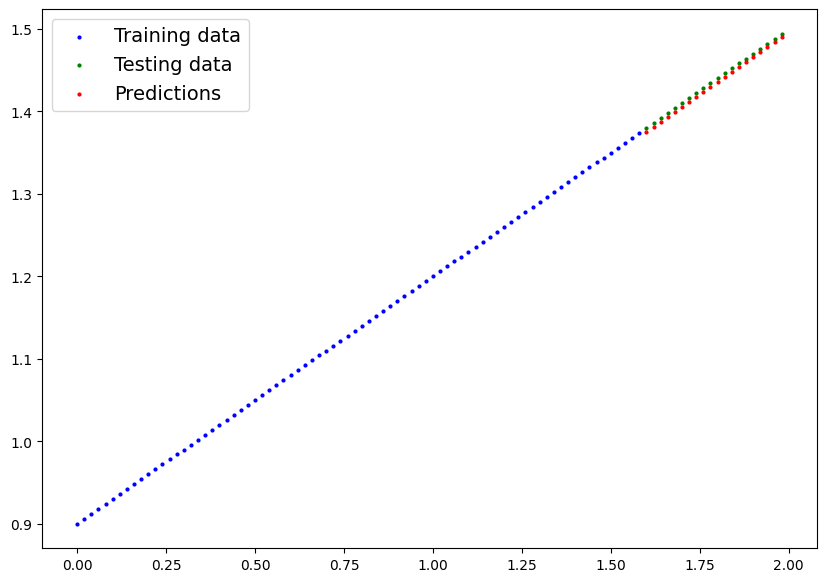

In [19]:
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), predictions=y_preds.cpu())

In [20]:
# Saving the pytorch model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "LiNet_2.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# Saving the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=LiNet_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\LiNet_2.pth


In [24]:
# Loading the PyTorch model
loaded_LiNet_2 = LinearRegressionModelV3()
loaded_LiNet_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_LiNet_2 = loaded_LiNet_2.to(device)

In [25]:
loaded_LiNet_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3001]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8953], device='cuda:0'))])

In [26]:
# Make predictions on the test data using loaded model
loaded_LiNet_2.eval()
with torch.inference_mode():
    loaded_LiNet_2_preds = loaded_LiNet_2(X_test)
loaded_LiNet_2_preds

tensor([[1.3755],
        [1.3815],
        [1.3875],
        [1.3935],
        [1.3995],
        [1.4055],
        [1.4115],
        [1.4175],
        [1.4235],
        [1.4295],
        [1.4355],
        [1.4415],
        [1.4475],
        [1.4535],
        [1.4595],
        [1.4655],
        [1.4715],
        [1.4775],
        [1.4835],
        [1.4895]], device='cuda:0')

In [27]:
# Comparing the loaded model predictions with previous model predictions
loaded_LiNet_2_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')